# Implementation of DiffiMax, using python-chess and Stockfish

## (Work in progress)

In [22]:
import chess
import chess.engine
import chess.svg

In [2]:
board = chess.Board()

In [3]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


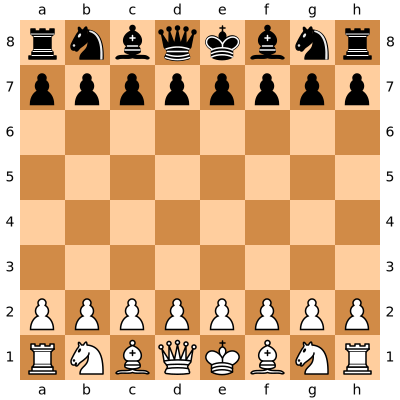

In [4]:
board

In [23]:
engine = chess.engine.SimpleEngine.popen_uci('Desktop\stockfish-10-win\Windows\stockfish_10_x64') 

In [ ]:
for info in engine.analysis(chess.Board()):
    print(info)

In [12]:
for x in board.legal_moves:
    print(x)

g1h3
g1f3
b1c3
b1a3
h2h3
g2g3
f2f3
e2e3
d2d3
c2c3
b2b3
a2a3
h2h4
g2g4
f2f4
e2e4
d2d4
c2c4
b2b4
a2a4


In [30]:
board = chess.Board()
legal_moves = board.legal_moves
for x in board.legal_moves:
    print(x)
    move = chess.Move.from_uci(str(x))
    board.push(move)

    print(board)
    info = engine.analyse(board, chess.engine.Limit(time=5))
    print(info)
    print('Score:', info['score'],'\n')
    
    board.pop()

g1h3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
{'depth': 24, 'seldepth': 34, 'multipv': 1, 'score': PovScore(Cp(+98), BLACK), 'nodes': 20169427, 'nps': 1344538, 'tbhits': 0, 'time': 15.001, 'pv': [Move.from_uci('e7e5'), Move.from_uci('c2c4')], 'hashfull': 998, 'currmove': Move.from_uci('e7e5'), 'currmovenumber': 1, 'upperbound': True, 'lowerbound': True}
Score: +98 

g1f3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R
{'depth': 25, 'seldepth': 34, 'multipv': 1, 'score': PovScore(Cp(-9), BLACK), 'nodes': 19165830, 'nps': 1277636, 'tbhits': 0, 'time': 15.001, 'pv': [Move.from_uci('d7d5'), Move.from_uci('d2d4'), Move.from_uci('c8f5'), Move.from_uci('c2c4'), Move.from_uci('e7e6'), Move.from_uci('b1c3'), Move.from_uci('f8b4'), Move.from_uci('c4d5'), Move.from_uci('e6d5'), Move.from_uci('c1g5'), Move.from_uci('g8e7'), Move.from

## DiffiMax to be implemented

In [ ]:
def DiffiMax(node,drawThresh,winThresh,yourNum):
    if node.depth != 1: # Cycles through all nodes
        for child in node.children:
            child.value = DiffiMax(child,drawThresh,winThresh,yourNum)
        node.value = DiffiSort(node,drawThresh,winThresh,yourNum)
        #print('Depth:',node.depth)
        #print('Value:',node.value)
        return node.value
    else: # Nodes with depth 1 start here and return 
        depth1Val = DiffiSort(node,drawThresh,winThresh,yourNum)
        return depth1Val

def DiffiSort(node,drawThresh,winThresh,yourNum):
    node.children.sort(reverse=True,key=lambda a:a.value) # Sorts children for future selections
    if node.player == -yourNum: # If it is your opponent's choice
        if len(node.children) == 1: # If node has one child, as next condition requires two children.
            return node.children[0].value
        elif node.player == -1: # Opponent has black pieces
            if (node.children[-1].value - node.children[-2].value <= -winThresh)\
                                        & (node.children[-2].value >= winThresh)\
                                        & (len(node.children)>=10)\
                                        & (node.children[-1].value >= -drawThresh)\
                                        & (node.check != 1) & (node.capture != 1)\
                                        & (node.children[-1].capture != 1)\
                                        & (node.children[-2].capture != 1):
                                        # Conditions in order include the following:
                                        # Does the evaluation difference make it a trap?
                                        # Are you now winning?
                                        # Are there more than 10 moves in the position?
                                        # Is opponent's best move still a draw for you?
                                        # Are current/previous positions checks/captures?
                print('Trap Found!')
                print('Depth:',node.children[-2].depth)
                print('Evaluation:',node.children[-2].value)
                return node.children[-2].value
            else:
                return node.children[-1].value
        elif node.player == 1: # Opponent has white pieces
            if (node.children[0].value - node.children[1].value >= winThresh)\
                                        & (node.children[1].value <= -winThresh)\
                                        & (len(node.children)>=10)\
                                        & (node.children[0].value <= drawThresh)\
                                        & (node.check != 1) & (node.capture != 1)\
                                        & (node.children[0].capture != 1)\
                                        & (node.children[1].capture != 1):
                print('Trap Found!')
                print('Depth:',node.children[1].depth)
                print('Evaluation:',node.children[1].value)
                return node.children[1].value
            else:
                return node.children[0].value
    elif node.player == yourNum: # If it is your choice
        if node.player == 1: # You have the white pieces
            return node.children[0].value
        elif node.player == -1: # You have the black pieces
            return node.children[-1].value

## MiniMax sample code (from https://github.com/AnthonyASanchez/PythonChessAi/blob/master/Minimax.py)

In [ ]:
def minimaxRoot(depth, board,isMaximizing):
    possibleMoves = board.legal_moves
    bestMove = -9999
    secondBest = -9999
    thirdBest = -9999
    bestMoveFinal = None
    for x in possibleMoves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        value = max(bestMove, minimax(depth - 1, board, not isMaximizing))
        board.pop()
        if( value > bestMove):
            print("Best score: " ,str(bestMove))
            print("Best move: ",str(bestMoveFinal))
            print("Second best: ", str(secondBest))
            thirdBest = secondBest
            secondBest = bestMove
            bestMove = value
            bestMoveFinal = move
    return bestMoveFinal

def minimax(depth, board, is_maximizing):
    if(depth == 0):
        return -evaluation(board)
    possibleMoves = board.legal_moves
    if(is_maximizing):
        bestMove = -9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = max(bestMove,minimax(depth - 1, board, not is_maximizing))
            board.pop()
        return bestMove
    else:
        bestMove = 9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = min(bestMove, minimax(depth - 1, board, not is_maximizing))
            board.pop()
        return bestMove